# Vector data visualization in three dimensions

We present two methods for vector visualization:

- Glyphs: We use symbols (commonly arrows) to depict the magnitude and direction of the vector.
- Streamlines: We present lines that are tangent to the vectors in each point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipyvolume as ipv
from mayavi import mlab

In [2]:
%matplotlib notebook
#mlab.init_notebook()
plt.style.use("../img/matplotlib.mplstyle")

In [3]:
def charged_sphere(e0=1, Q=1, R=1,
                   limits=(-5, 5, -5, 5, -5, 5),
                   grid=(21, 21, 21), r0=(0, 0, 0)):
    """
    """
    from scipy import stats
    xmin, xmax, ymin, ymax, zmin, zmax = limits
    nx, ny, nz = grid
    x0, y0, z0 = r0
    x, y, z = np.mgrid[xmin:xmax:nx*1j,
                       ymin:ymax:ny*1j,
                       zmin:zmax:nz*1j]
    r = np.sqrt(x**2 + y**2 + z**2)
    rmin = stats.scoreatpercentile(r.ravel(), 1)
    r[r < rmin] = rmin
    V = 1/(4*np.pi*e0) * Q/r
    V[r < R] = 1/(4*np.pi*e0) * Q/R
    Emag = 1/(4*np.pi*e0) * Q/r**2
    Emag[r < R] = 1/(4*np.pi*e0) * Q*r[r < R]/R**2
    Ex = Emag * x/r
    Ey = Emag * y/r
    Ez = Emag * z/r
    return x + x0, y + y0, z + z0, V, Ex, Ey, Ez

In [4]:
X, Y, Z, V, Ex, Ey, Ez = charged_sphere()

## Glyphs visualization

In [5]:
ipv.figure()
ipv.quickquiver(X.flatten(), Y.flatten(), Z.flatten(),
                Ex.flatten(), Ey.flatten(), Ez.flatten(),
                size=5)
ipv.show()

In [6]:
mlab.figure()
mlab.quiver3d(X, Y, Z, Ex, Ey, Ez, mask_points=10,
             colormap="hot", scale_factor=200)
mlab.contour3d(X, Y, Z, V, opacity=0.4, colormap="viridis")
mlab.show()

<IPython.core.display.Javascript object>


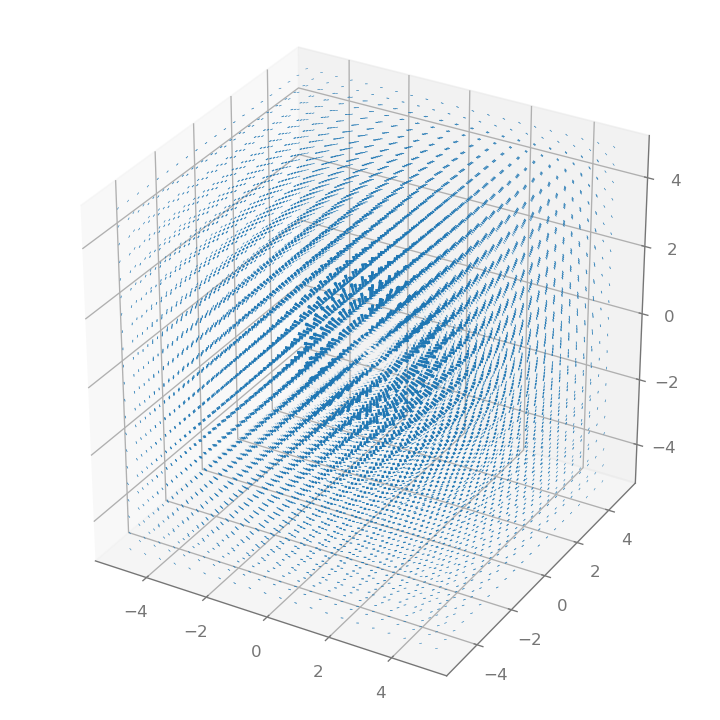

In [7]:
fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
ax.quiver(X, Y, Z, Ex, Ey, Ez, length=10);

## Streamlines


In [8]:
mlab.figure()
mlab.flow(X, Y, Z, Ex, Ey, Ez, scalars=V, linetype="tube",
          seed_visible=False, seed_scale=0.5, seed_resolution=10,
          colormap="viridis")
mlab.show()

## Exercise 

We want to visualize the electric field and potential of a couple of electric charges.

The following snippet generate the fields.

In [9]:
X, Y, Z, V1, Ex1, Ey1, Ez1 = charged_sphere(Q=1, r0=(-1, 0, 0)) 
_, _, _, V2, Ex2, Ey2, Ez2 = charged_sphere(Q=-1, r0=(1, 0, 0))  

In [10]:
Ex = Ex1 + Ex2
Ey = Ey1 + Ey2
Ez = Ez1 + Ez2

In [11]:
# This cell stylize the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open('./custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()